<h1 align="center">Formatos de datos</font></h1>

**CSV**

Comma Separated Values (valores separados por comas). Requiere que cada 
elemento de nuestro conjunto se presente en una línea. Dentro de esa línea, cada uno 
de los atributos del elemento debe estar separado por un único separador, que 
habitualmente es una coma, y seguir siempre el mismo orden. Además, la primera 
línea del fichero, a la que llamaremos cabecera, no contiene datos de ningún 
elemento, sino información de los atributos. Si el campo contiene alguna coma, 
utilizaremos un delimitador como por ejemplo " ".

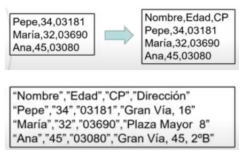

XML

Extensive Markup Languaje (lenguaje de marcas extensible). Es un lenguaje de 
etiquetas utilizado para almacenar datos de forma estructurada.

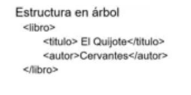

JSON

JavaScript Object Notation, es un formato muy utilizado hoy en día, tiene el mismo 
propósito que el XML que es el intercambio de datos pero no utiliza las etiquetas 
abiertas y cerradas, sino que pretende que pese menos, es decir que ocupe menos 
espacio.

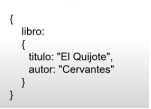

Avro

Es un formato de almacenamiento basado en filas para Hadoop. Avro se basa 
en esquemas. Cuando los datos .avro son leídos siempre está presente el esquema 
con el que han sido escritos. Avro utiliza JSON para definir tipos de datos y 
protocolos. Es el formato utilizado para la serialización de datos ya que es más rápido 
y ocupa menos espacio que los JSON, la serialización de los datos la hace en un 
formato binario compacto.

Parquet

Es un formato de almacenamiento basado en columnas para Hadoop. Fue creado 
para poder disponer de un formato de compresión y codificación eficiente. El formato 
Parquet está compuesto por tres piezas:

• Row group: es un conjunto de filas en formato columnar.

• Column chunk: son los datos de una columna en grupo. Se puede leer de 
manera independiente para mejorar las lecturas.

• Page: es donde finalmente se almacenan los datos, debe ser lo 
suficientemente grade para que la compresión sea eficiente.


<h1 align="center">Formatos de datos a detalle</font></h1>

En el procesamiento de datos mediante herramientas como Hadoop o Spark, es esencial escoger un formato de archivo adecuado para facilitar la gestión de los datos en distintos pipelines. Los formatos de datos deben ser:

- Independientes del lenguaje
- Expresivos, con soporte para estructuras complejas
- Eficientes y ligeros en tamaño
- Dinámicos para adaptarse a nuevos tipos de datos
- Autónomos y divisibles para facilitar la compresión y el procesamiento paralelo

Existen dos tipos principales de formatos de almacenamiento:

1. **Texto**: como CSV, XML y JSON, que son más lentos y ocupan más espacio, pero permiten una mejor interoperabilidad.
2. **Binarios**: como Avro, Parquet y ORC, que ofrecen mejor rendimiento y ocupan menos espacio, aunque son menos expresivos.

Elegir el formato adecuado mejora el rendimiento, facilita la división del archivo en fragmentos (splittable), y permite la compresión y la evolución de esquemas para el almacenamiento eficiente de datos.

<h1 align="center">Filas vs columnas</font></h1>

Los formatos con los que estamos más familiarizados, como son CSV, XML o JSON, 
son formatos basados en filas, donde cada registro se almacena en una fila o 
documento. Estos formatos son más lentos en ciertas consultas y su almacenamiento 
no es óptimo.

JSON VS JSONL

Un documento JSON contiene diferentes pares de clave-valor con los elementos que 
lo componen ocupando varias líneas.
Un tipo específico de JSON es JSON (JSON Lines), el cual almacena una secuencia de 
objetos JSON delimitando cada objeto por un saldo de línea.

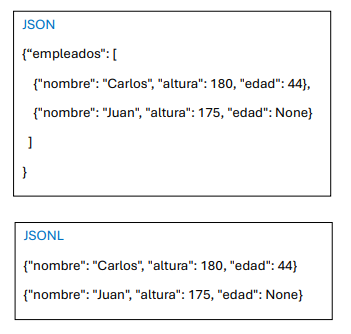

En un formato basado en columnas, cada columna se almacena en su conjunto de 
ficheros, es decir, cada registro almacena toda la información de una columna. Al 
basarse en columnas, ofrece mejor rendimiento para consultas de determinadas 
columnas y/o agregaciones, y el almacenamiento es más óptimo (como todos los 
datos de una columna son del mismo tipo, la compresión es mayor).

Supongamos que tenemos los siguientes datos:


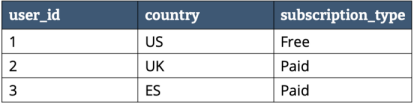

Dependiendo del almacenamiento en filas o columnas tendríamos la siguiente 
representación:

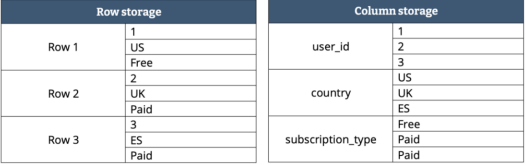

Como hemos comentado previamente, en un formato columnar los datos del mismo 
tipo se agrupan, lo que mejora el rendimiento de acceso y reduce el tamaño:

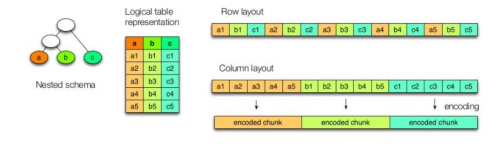

El almacenamiento en columnas y la compresión de datos tienen desventajas en el acceso y actualización de registros individuales. Para acceder a un registro, se necesita reconstruirlo a partir de varias columnas, lo cual implica leer múltiples archivos. Además, actualizar un registro requiere descomprimir, modificar, recomprimir y escribir nuevamente el archivo, lo que incrementa la carga computacional.

Para reducir este impacto, se utilizan estrategias de particionado y clustering, organizando las columnas en archivos más pequeños según los patrones de consulta. Sin embargo, este enfoque sigue siendo ineficiente para actualizaciones individuales, por lo que las bases de datos columnares no son ideales para cargas de trabajo transaccionales (OLTP), donde se prefiere el almacenamiento orientado a filas.

<h1 align="center">Tamaño</font></h1>

https://blog.openbridge.com/how-to-be-a-hero-with-powerful-parquet-google-and-amazon-f2ae0f35ee04
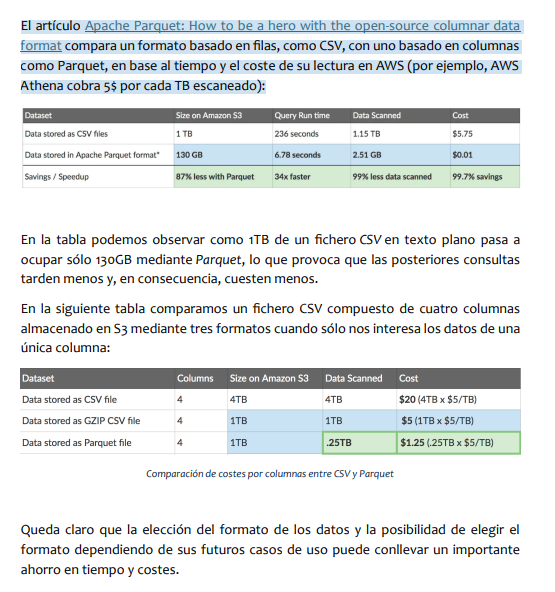

<h1 align="center">Avro</font></h1>

[Apache Avro](https://avro.apache.org/) es un formato de almacenamiento basado en filas, que ofrece mayor velocidad y ocupa menos espacio que JSON, gracias a la serialización en un formato binario compacto con metadatos de esquema en JSON. Avro soporta la compresión de bloques y permite dividir datos en fragmentos, lo cual lo hace ideal para el ecosistema de Hadoop y compatible con la mayoría de herramientas en la nube.

El formato de Avro se basa en esquemas definidos en JSON, que describen los tipos de datos y protocolos. Cada archivo .avro almacena el esquema en su cabecera, seguido de los datos en binario. Los esquemas de Avro incluyen tipos primitivos (como boolean, int, string) y compuestos (como record, array, map).

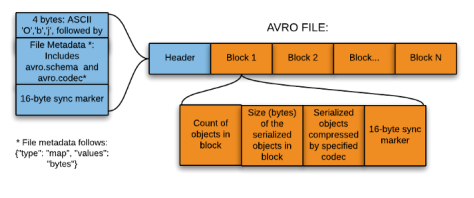

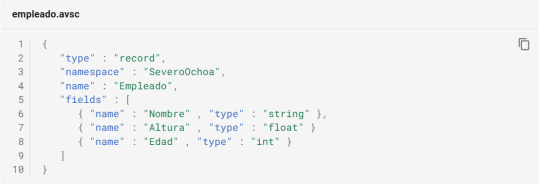

<h1 align="center">Avro y Python</font></h1>

Para poder serializar y deserializar documentos Avro mediante Python, previamente 
debemos instalar la librería [avro](https://avro.apache.org/docs/1.11.1/getting-started-python/):

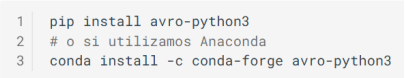

Vamos a realizar un ejemplo donde primero leemos un esquema de un archivo Avro, 
y con dicho esquema, escribiremos nuevos datos en un fichero. A continuación, 
abrimos el fichero escrito y leemos y mostramos los datos:


In [6]:
import avro
import copy
import json
from avro.datafile import DataFileReader, DataFileWriter
from avro.io import DatumReader , DatumWriter

# Abrimos el fichero en modo binario y leemos el esquema
schema = avro.schema.parse(open("empleado.avsc", "rb").read())

# Escribimos un fichero a partir del esquema leido
with open('empleados.avro' , 'wb') as f:
    writer = DataFileWriter(f, DatumWriter(),schema)
    writer.append({"Nombre" : "Carlos", "Altura":180 , "Edad" :44})
    writer.append({"Nombre" : "Juan" , "Altura": 175, "Edad" : 33})
    writer.close()

# Abrimos el archivo creado, lo leemos y mostramos línea a línea
with open("empleados.avro" , "rb") as f:
    reader = DataFileReader(f, DatumReader())
    # Copiamos los metadatos del fichero leído
    metadata = copy.deepcopy(reader.meta)
    # Obtenemos el schema del fichero leído
    SchemaFromFile = json.loads(metadata["avro.schema"])
    # Recuperamos los empleados
    empleados = [empleado for empleado in reader]
    reader.close

print(f'Schema de empleado.avsc:\n {schema}')
print(f'Schema del fichero empleados.avro\n {SchemaFromFile}')
print(f'Empleados:\n {empleados}')



Schema de empleado.avsc:
 {"type": "record", "name": "Empleado", "namespace": "SeveroOchoa", "fields": [{"type": "string", "name": "Nombre"}, {"type": "float", "name": "Altura"}, {"type": "int", "name": "Edad"}]}
Schema del fichero empleados.avro
 {'type': 'record', 'name': 'Empleado', 'namespace': 'SeveroOchoa', 'fields': [{'type': 'string', 'name': 'Nombre'}, {'type': 'float', 'name': 'Altura'}, {'type': 'int', 'name': 'Edad'}]}
Empleados:
 [{'Nombre': 'Carlos', 'Altura': 180.0, 'Edad': 44}, {'Nombre': 'Juan', 'Altura': 175.0, 'Edad': 33}]


<h1 align="center">Fastavro</font></h1>

Para trabajar con Avro y grandes volúmenes de datos, es mejor utilizar la 
librería Fastavro (https://github.com/fastavro/fastavro) la cual ofrece un rendimiento 
mayor (en vez de estar codificada en Python puro, tiene algunos fragmentos 
realizados mediante Cython).
Primero, hemos de instalar la librería:

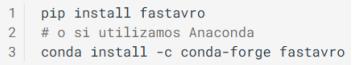

In [9]:
import fastavro
import copy
import json
from fastavro import reader

# Abrimos el fichero en modo binario y leemos el esquema
with open("empleado.avsc", "rb") as f:
    schemaJSON = json.load(f)
schemaDict = fastavro.parse_schema(schemaJSON)

empleados = [ {"Nombre" : "Carlos" , "Altura": 180, "Edad": 44},
             {"Nombre" : "Jesus" , "Altura": 183, "Edad": 31}]

# Escribimos un fichero a partir del esquema leído
with open("empleadosf.avro", "wb") as f:
    fastavro.writer(f, schemaDict, empleados)

# Abrimos el archivo creado, lo leemos y mostramos línea a línea
with open("empleadosf.avro", "rb") as f:
    reader = fastavro.reader(f)
    # Copiamos los metadatos del fichero leído
    metadata = copy.deepcopy(reader.metadata)
    # Obtenemos el schema del fichero leído
    schemaReader = copy.deepcopy (reader.writer_schema)
    SchemaFromFile = json.loads(metadata["avro.schema"])
    # Recuperamos los empleados
    empleados = [empleado for empleado in reader]

print(f"Schema de empleado.avsc:\n {schemaDict}")
print(f"Schema del fichero empleadosf.avro:\n {SchemaFromFile}")
print(f"Empleados:\n {empleados}")

Schema de empleado.avsc:
 {'type': 'record', 'name': 'SeveroOchoa.Empleado', 'fields': [{'name': 'Nombre', 'type': 'string'}, {'name': 'Altura', 'type': 'float'}, {'name': 'Edad', 'type': 'int'}], '__fastavro_parsed': True, '__named_schemas': {'SeveroOchoa.Empleado': {'type': 'record', 'name': 'SeveroOchoa.Empleado', 'fields': [{'name': 'Nombre', 'type': 'string'}, {'name': 'Altura', 'type': 'float'}, {'name': 'Edad', 'type': 'int'}]}}}
Schema del fichero empleadosf.avro:
 {'type': 'record', 'name': 'SeveroOchoa.Empleado', 'fields': [{'name': 'Nombre', 'type': 'string'}, {'name': 'Altura', 'type': 'float'}, {'name': 'Edad', 'type': 'int'}]}
Empleados:
 [{'Nombre': 'Carlos', 'Altura': 180.0, 'Edad': 44}, {'Nombre': 'Jesus', 'Altura': 183.0, 'Edad': 31}]


<h1 align="center">Fastavro y pandas</font></h1>

Finalmente, vamos a realizar un último ejemplo con las dos librerías más utilizadas.
Vamos a leer un fichero CSV de ventas mediante Pandas, y tras limpiar los datos y 
quedarnos únicamente con las ventas de Alemania, almacenaremos el resultado del 
procesamiento en Avro.

In [19]:
import pandas as pd
from fastavro import writer, parse_schema

# Leemos el csv mediante pandas
df = pd.read_csv('pdi_sales.csv', sep=';')
# Limpiamos los datos (Strip a los códigos postales) y nos quedamos con Alemania
df["Zip"] = df["Zip"].str.strip()
filtro = df.Country == "Germany"
df = df[filtro]

# 1. Definimos el Schema
schema = {
    'name': 'Sales',
    'namespace': 'SeveroOchoa',
    'type': 'record',
    'fields': [
        {'name': 'ProductID', 'type': 'int'},
        {'name': 'Date', 'type': 'string'},
        {'name': 'Zip', 'type': 'string'},
        {'name': 'Units', 'type': 'int'},
        {'name': 'Revenue', 'type': 'float'},
        {'name': 'Country', 'type': 'string'}
    ]
}
schemaParseado = parse_schema(schema)

# 2. Convertimos el Dataframe a una lista de diccionarios
records = df.to_dict("records")

# 3. Persisitimos en un fichero avro
with open("sales.avro", "wb") as f:
    writer(f, schemaParseado, records)
 

<h1 align="center">Comprimiendo los datos</font></h1>

¿Y sí comprimimos los datos para ocupen menos espacio en nuestro clúster y por 
tanto, nos cuesten menos dinero?
La compresión de datos es compleja, pero la idea básica es fácil de entender, ya que 
los algoritmos de compresión buscan redundancia y repetición en los datos, 
recodificando los datos para reducir la redundancia.
Al comprimir los datos, además de ocupar menos espacio, la lectura de éstos será 
más rápida y se enviarán menos datos a través de la red, mejorando los tiempos de 
trabajo. Eso sí, no hemos de olvidar que comprimir y descomprimir los archivos 
conlleva un tiempo extra y consumo de recursos para leer o escribir los datos.
Fastavro soporta dos tipos de compresión: gzip (mediante el algoritmo deflate) 
y snappy. [Snappy](https://github.com/google/snappy) es una biblioteca de compresión y descompresión de datos de gran 
rendimiento que se utiliza con frecuencia en proyectos Big Data, la cual prioriza la 
velocidad sobre el tamaño resultante.


Antes de nada la hemos de instalar mediante:

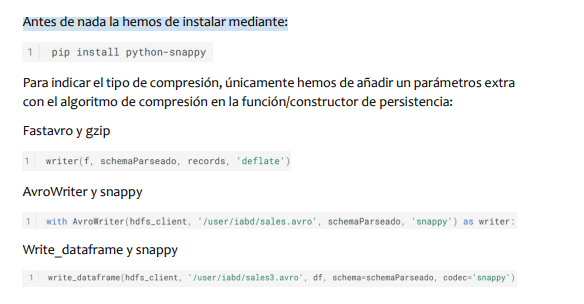

<h1 align="center">Comparando algoritmos de compresión</font></h1>

Respecto a la compresión, sobre un fichero de 100GB, podemos considerar media si 
ronda los 50GB y alta si baja a los 40GB.

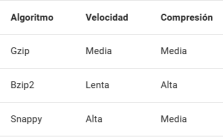

Más que un tema de espacio, necesitamos que los procesos sean eficientes y por eso 
priman los algoritmos que son más rápidos. Si te interesa el tema, es muy interesante 
el artículo [Data Compression in Hadoop](https://comphadoop.weebly.com/).
Por ejemplo, si realizamos el ejemplo de Fast Avro y Pandas con acceso local 
obtenemos los siguientes tamaños:

• Sin compresión: 6,9 MiB

• Gzip: 1,9 MiB

• Snappy: 2,8 MiB

<h1 align="center">Parquet</font></h1>

[Apache Parquet](https://parquet.apache.org/) es un formato de almacenamiento basado en columnas 
para Hadoop, con soporte para todos los frameworks de procesamiento de datos, así 
como lenguajes de programación. De la misma forma que Avro, se trata de un 
formato de datos auto-descriptivo, de manera que embebe el esquema o estructura 
de los datos con los propios datos en sí. Parquet es idóneo para analizar datasets que 
contienen muchas columnas, es decir, para lecturas de grandes cargas de trabajo.
Tiene un ratio de compresión muy alto (mediante Snappy ronda el 75%), y además, 
solo se recorren las columnas necesarias en cada lectura, lo que reduce las 
operaciones de entrada/salida en disco.
Formato
Cada fichero Parquet almacena los datos en binario organizados en grupos de filas. 
Para cada grupo de filas (row group), los valores de los datos se organizan en 
columnas, lo que facilita la compresión a nivel de columna.
La columna de metadatos de un fichero Parquet se almacena al final del fichero, lo 
que permite que las escrituras sean rápidas con una única pasada. Los metadatos 
pueden incluir información como los tipos de datos, esquemas de 
codificación/compresión, estadísticas, nombre de los elementos, etc...

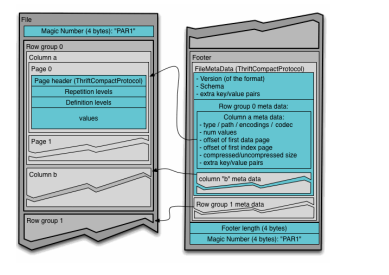

<h1 align="center">Parquet y Python</font></h1>

Para interactuar con el formato Parquet mediante Python, la librería más utilizada es 
la que ofrece Apache Arrow, en concreto la librería PyArrow.
Así pues, la instalamos mediante pip:
Apache Arrow usa un tipo de estructura denominada tabla para almacenar los datos 
bidimensional (sería muy similar a un Dataframe de Pandas). La documentación 
de PyArrow dispone de un [libro de recetas ](https://arrow.apache.org/cookbook/py/)con ejemplos con código para los 
diferentes casos de uso que se nos puedan plantear.
Vamos a simular el mismo ejemplo que hemos realizado previamente mediante Avro, 
y vamos a crear un fichero en formato JSON con empleados, y tras persistirlo en 
formato Parquet, lo vamos a recuperar:
Empleados en columnas:


In [21]:
import pyarrow.parquet as pq
import pyarrow as pa

# 1. - Definimos el esquema
schema = pa.schema([ ("nombre" , pa.string()),
                    ("altura" , pa.int32()),
                    ("edad" , pa.int32()) ])

# 2. - Almacenamos los empleados por columnas
empleados = {"nombre": ["Carlos" , "Juan"],
             "altura" : [180,44],
             "edad": [25, None]}

# 3. - Creamos una tabla Arrow y la persistimos mediante Parquet
tabla = pa.Table.from_pydict(empleados, schema)
pq.write_table(tabla, "empleados.parquet")

# 4. - Leemos el fichero generado
table2 = pq.read_table("empleados.parquet")
SchemaFromFile = table2.schema

print(f"Schema del fichero empleados.parquet:\n {SchemaFromFile}\n")
print(f"Tabla de Empleados:\n{table2}")

Schema del fichero empleados.parquet:
 nombre: string
altura: int32
edad: int32

Tabla de Empleados:
pyarrow.Table
nombre: string
altura: int32
edad: int32
----
nombre: [["Carlos","Juan"]]
altura: [[180,44]]
edad: [[25,null]]


Empleados en filas.

Para que pyarrow pueda leer los empleados como documentos JSON, hoy en día sólo 
puede hacerlo leyendo documentos individuales almacenados en fichero. Por lo 
tanto, creamos el fichero empleados.json con la siguiente información

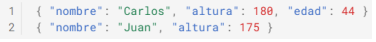

In [25]:
import pyarrow.parquet as pq
import pyarrow as pa
from pyarrow import json

# 1.- Definimos el esquema 
schema = pa.schema([ ("nombre" , pa.string()),
                    ("altura" , pa.int32()),
                    ("edad" , pa.int32()) ])

# 2.- Leemos los empleados
tabla = json.read_json("empleados.jsonl")
# 3.- Persistimos la tabla en parquet
pq.write_table(tabla, "empleados-json.parquet")

# 4.- Leemos el fichero generado
table2 = pq.read_table("empleados-json.parquet")
SchemaFromFile = table2.schema

print(f"Schema del fichero empleados-json.parquet:\n {SchemaFromFile}\n")
print(f"Tabla de Empleados:\n{table2}")

Schema del fichero empleados-json.parquet:
 nombre: string
altura: int64
edad: int64

Tabla de Empleados:
pyarrow.Table
nombre: string
altura: int64
edad: int64
----
nombre: [["Carlos","Juan"]]
altura: [[180,175]]
edad: [[44,null]]


<h1 align="center">Parquet y Pandas</font></h1>

En el caso del uso de Pandas el código todavía se simplifica más. Si reproducimos el 
mismo ejemplo que hemos realizado con Avro tenemos que los Dataframes ofrecen 
el método [to_parquet](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_parquet.html) para exportar a un fichero Parquet:

In [31]:
import pandas as pd

df = pd.read_csv("pdi_sales.csv", sep=";")

df["Zip"] = df["Zip"].str.strip()
filtro = df.Country=="Germany"
df = df[filtro]

# A partir de un DataFrame, persistimos los datos
df.to_parquet("pdi_sales.parquet")

Para leer un archivo utilizaremos el método read_parquet

In [33]:
df_parquet = pd.read_parquet("pdi_sales.parquet")
print(df)

        ProductID        Date    Zip  Units  Revenue  Country
0             725   1/15/1999  41540      1    115.5  Germany
1             787  06/06/2002  41540      1    314.9  Germany
2             788  06/06/2002  41540      1    314.9  Germany
3             940   1/15/1999  22587      1    687.7  Germany
4             396   1/15/1999  22587      1    857.1  Germany
...           ...         ...    ...    ...      ...      ...
759857        443   4/21/2015  22605      1    923.7  Germany
759858        515   4/21/2015  42283      1    524.7  Germany
759859       1009   4/21/2015  41366      1    112.8  Germany
759860        487   4/21/2015  22047      1   1102.5  Germany
759861        699   4/21/2015  40599      1    238.8  Germany

[234072 rows x 6 columns]


<h1 align="center">ORC</font></h1>

[Apache ORC](https://orc.apache.org/) es un formato de datos columnar (Optimized Row Columnar) similar 
a Parquet pero optimizado para la lectura, escritura y procesamiento de datos 
en Hive. ORC tiene una tasa de compresión alta (utiliza zlib), y al basarse en Hive, 
soporta sus tipos de datos simples (datetime, decimal, etc...) y los tipos complejos 
(como struct, list, map y union), siendo totalmente compatible con HiveQL.
Los fichero ORC se componen de tiras de datos (stripes), donde cada tira contiene un 
índice, los datos de la fila y un pie (con estadísticas como la cantidad, máximos y 
mínimos y la suma de cada columna convenientemente cacheadas)

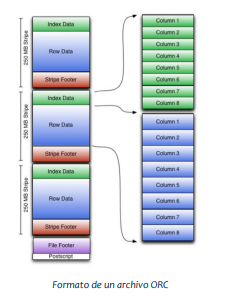

<h1 align="center">ORC y Python</font></h1>

Si queremos usar Pandas, para leer un fichero ORC emplearemos el método [read_orc](https://pandas.pydata.org/docs/reference/api/pandas.read_orc.html):

In [ ]:
df_orc = pd.read_orc("pdi_sales.orc")

Y para persistirlo, desde la versión 1.5 de Pandas, a partir de un DataFrame, podemos 
persistir los datos mediante el método[ to_orc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_orc.html).
Por defecto, los archivos ORC se persisten sin comprimir. Si queremos comprimirlos, 
debemos pasarle los parámetros mediante el atributo engine_kwargs mediante un 
diccionario:

In [ ]:
df.orc.to_orc("pdi_sales_zlib.orc", engine_kwargs={"compression":"zlib"})

Además, también podemos podemos hacerlo de nuevo desde la librería [PyArrow](https://arrow.apache.org/docs/python/). Así 
pues, para la escritura de datos, por ejemplo, desde un Dataframe, haríamos:

In [19]:
import pandas as pd
import pyarrow as pa
import pyarrow.orc as orc

df= pd.read_csv("pdi_sales.csv", sep=";")

#Limpiamos los datos (strip a los códigos postales) y nos quedamos con Alemania
df["Zip"] = df["Zip"].str.strip()
filtro = df.Country== "Germany"
df = df[filtro]

table = pa.Table.from_pandas(df, preserve_index=False)
orc.write_table(table, "pdi_sales.orc")


<h1 align="center">Comparando formatos</font></h1>

Acabamos de ver que cada uno de los formatos tiene sus puntos fuertes.

Los formatos basados en filas ofrecen un rendimiento mayor en las escrituras que en 
las lecturas, ya que añadir nuevos registros en más sencillo. Si sólo vamos a hacer 
consultas sobre un subconjunto de las columnas, entonces un formato columnar se 
comportará mejor, ya que no necesita recuperar los registros enteros (cosa que sí 
hacen los formatos basados en filas).
Respecto a la compresión, entendiendo que ofrece una ventaja a la hora de 
almacenar y transmitir la información, es útil cuando trabajamos con un gran volumen 
de datos. Los formatos basados en columnas ofrecen un mejor rendimiento ya que 
todos los datos del mismo tipo se almacenan de forma contigua lo que permite una 
mayor eficiencia en la compresión (además, cada tipo de columna tiene su propia 
codificación).

Respecto a la evolución del esquema, con operaciones como añadir o eliminar 
columnas o cambiar su nombre, la mejor decisión es decantarse por Avro. Además, al 
tener el esquema en JSON facilita su gestión y permite que tengan más de un 
esquema.
Si nuestros documentos tienen una estructura compleja compuesta por columnas 
anidadas y normalmente realizamos consultas sobre un subconjunto de las 
subcolumnas, la elección debería ser Parquet, por la estructura que utiliza.

Finalmente, recordar que ORC está especialmente enfocado a su uso con Hive, 
mientras que Spark tiene un amplio soporte para Parquet y que si trabajamos 
con Kafka, Avro es una buena elección.

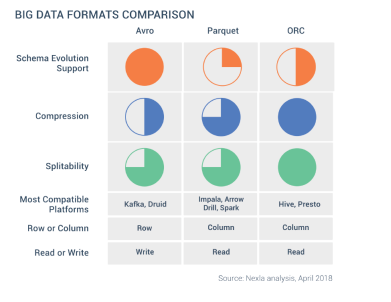

<h1 align="center">Actividades</font></h1>

Mediante Python y utilizando Kaggle, crea un notebook a partir de los datos 
del dataset de retrasos en los vuelos y a partir de uno de los ficheros (el que más te 
guste), y teniendo en cuenta que los campos están separados por comas (,), 
transforma los datos y persiste los siguientes archivos:

• air<anyo>.parquet: el archivo CSV en formato Parquet.

• air<anyo>.orc: el archivo CSV en formato ORC.

• air<anyo>_snappy.orc: el archivo CSV comprimido en formato Snappy en 
formato ORC.

• air<anyo>_small.avro: la fecha (FL_DATE), el identificador de la aerolínea 
(OP_CARRIER) y el retraso de cada vuelo (DEP_DELAY) en formato Avro.

1. Air.parquet

In [2]:
import pandas as pd

# Leer el csv
df = pd.read_csv("2016.csv", sep=";")

# A partir de un DataFrame, persistimos los datos
df.to_parquet("air2016.parquet")

# Mostrar el resultado
df_parquet = pd.read_parquet("air2016.parquet")
print(df)

        FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0        2016-01-01,DL,1248,DTW,LAX,1935,1935.0,0.0,23....                                                                                                                                                                                                                                                                                     
1        2016-01-01,DL,1251,ATL,GRR,2125,2130.0,5.0,13....                                                                                                                                                                                                                                                                              

2. Air.ORC

In [4]:
import pandas as pd
import pyarrow as pa
import pyarrow.orc as orc

# Leer el archivo csv
df= pd.read_csv("2016.csv", sep=";")

# Pasar el csv a ORC
table = pa.Table.from_pandas(df, preserve_index=False)
orc.write_table(table, "air2016.orc")

3. Air.snappy

In [8]:
import pandas as pd
import pyarrow as pa
import pyarrow.orc as orc

# Leer el csv
df=pd.read_csv("2016.csv", sep=";")

# Pasar el archivo de csv a una tabla de arrow
table = pa.Table.from_pandas(df)

# Especificar la compresión Snappy
compression = "Snappy"

# Guardar la tabla en formato ORC con compresión Snappy
orc.write_table(table,"air2016_snappy.orc", compression= compression)

# imprimir el resultado
print(df)

        FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0        2016-01-01,DL,1248,DTW,LAX,1935,1935.0,0.0,23....                                                                                                                                                                                                                                                                                     
1        2016-01-01,DL,1251,ATL,GRR,2125,2130.0,5.0,13....                                                                                                                                                                                                                                                                              

4. Air.avro

In [31]:
import pandas as pd
import fastavro

# Leer el CSV
df = pd.read_csv("2016.csv")  # Ajusta el nombre y el delimitador si es necesario

df.columns = df.columns.str.strip()  # Elimina los espacios en blanco
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce')

# Filtrar las columnas necesarias: FL_DATE, OP_CARRIER, DEP_DELAY
df = df[['FL_DATE', 'OP_CARRIER', 'DEP_DELAY']]

# Definir el esquema Avro
schema = {
    "type": "record",
    "name": "FlightRecord",
    "fields": [
        {"name": "FL_DATE", "type": {"type": "long", "logicalType": "timestamp-millis"}},  # 'long' para fecha en milisegundos
        {"name": "OP_CARRIER", "type": "string"},
        {"name": "DEP_DELAY", "type": "float"}
    ]
}

# Preparar los registros del DataFrame en el formato adecuado para Avro
records = df.to_dict(orient="records")

# Nombre del archivo Avro, basado en el año de la fecha más reciente
avro_filename = f"air{df['FL_DATE'].dt.year.max()}_small.avro"

# Escribir en formato Avro
with open(avro_filename, 'wb') as out_file:
    fastavro.writer(out_file, schema, records)

print(f"Archivo Avro guardado como {avro_filename}")

Archivo Avro guardado como air2016_small.avro
